<font size="6"><center>**Breast Cancer Dataset EDA & Logistic Regression**</center></font>

<center>Author Laima Lukoseviciute</center>

<center>2025-04-22</center>

# Table of Contents
* [Introduction](#Introduction)
* [Data Preparation and Cleaning](#Data-Preparation-and-Cleaning)
  * [Importing the Data](#Importing-the-Data)
  * [Duplicate and Missing Values](#Duplicate-and-Missing-Values)
  * [Observations and Features](#Observations-and-Features)
  * [Outliers](#Outliers)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Distribution of Features](#Distribution-of-Features)
  * [Distribution of Features by Target](#Distribution-of-Features-by-Target)
* [Correlation Analysis](#Correlation-Analysis)
* [Logistic Regression](#Logistic-Regression)
* [Summary](#Summary)

# Introduction

For this classification task, we used the Breast Cancer Wisconsin Diagnostic Dataset available from sklearn.datasets. This dataset is widely used for binary classification and contains 30 numerical features computed from digitized images of fine needle aspirate (FNA) of breast masses. The goal is to predict whether a tumor is malignant (0) or benign (1) based on these features.

The dataset includes 569 samples, with an approximately balanced distribution of malignant and benign cases. For evaluation, a train-test split was applied, and a logistic regression model was trained and tested.

# Data Preparation and Cleaning
## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

from functions import plot_pairwise_in_chunks

In [2]:
# Setting plotting style
plt.style.use("fast")

In [3]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

## Duplicate and Missing Values

From the code below we can see that data have no missing values and no duplicated values.

In [4]:
# Checking for missing values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
# Checking for duplicated values
df.duplicated().sum()

0

## Observations and Features

The Breast Cancer Wisconsin dataset contains 569 observations and 30 numerical features extracted from digitized images of breast tissue samples. These features capture various characteristics of the cell nuclei, such as:

    Mean radius: average size of the cell nuclei

    Texture: standard deviation of gray-scale values

    Perimeter, area, and smoothness: describe shape and edges

    Concavity and symmetry: measure irregularities in cell shape

Each observation is labeled as either malignant (0) or benign (1). 

Below, let's look at some general data characteristics.

In [6]:
df.describe().round(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.05            0.08                 0.04           0.03   
min                0.02            0.00                 0.00           0.11   
25%                0.06            0.03                 0.02           0.16   
50%                0.09            0.06                 0.03           0.18   
75%                0.13            0.13                 0.07           0.20   
max                0.35            0.43                 0.20           0.30   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count                  569.00  ...         569.00           569.00   
mean                     0.06  ...          25.68           107.26   
std                      0.01  ...           6.15            33.60   
min                      0.05  ...          12.02            50.41   
25%                      0.06  ...          21.08            84.11   
50%                      0.06  ...          25.41            97.66   
75%                      0.07  ...          29.72           125.40   
max                      0.10  ...          49.54           251.20   

       worst area  worst smoothness  worst compactness  worst concavity  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       worst concave points  worst symmetry  worst fractal dimension  target  
count                569.00          569.00                   569.00  569.00  
mean                   0.11            0.29                     0.08    0.63  
std                    0.07            0.06                     0.02    0.48  
min                    0.00            0.16                     0.06    0.00  
25%                    0.06            0.25                     0.07    0.00  
50%                    0.10            0.28                     0.08    1.00  
75%                    0.16            0.32                     0.09    1.00  
max                    0.29            0.66                     0.21    1.00  

[8 rows x 31 columns]

## Outliers

 > In this notebook I will folow the Interquartile Range (IQR) definition of an outlier. Outlier is defined as a data point that lies outside of the range determined by the first quartile (Q1) and the third quartile (Q3), using the following criteria:
>    - Lower bound: Q1−1.5×IQRQ1−1.5×IQR
>    - Upper bound: Q3+1.5×IQRQ3+1.5×IQR
>      
>This definition is also used as default in [matplotlib.pyplot.boxplot](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.boxplot), which will be useful for visually representing the outliers.

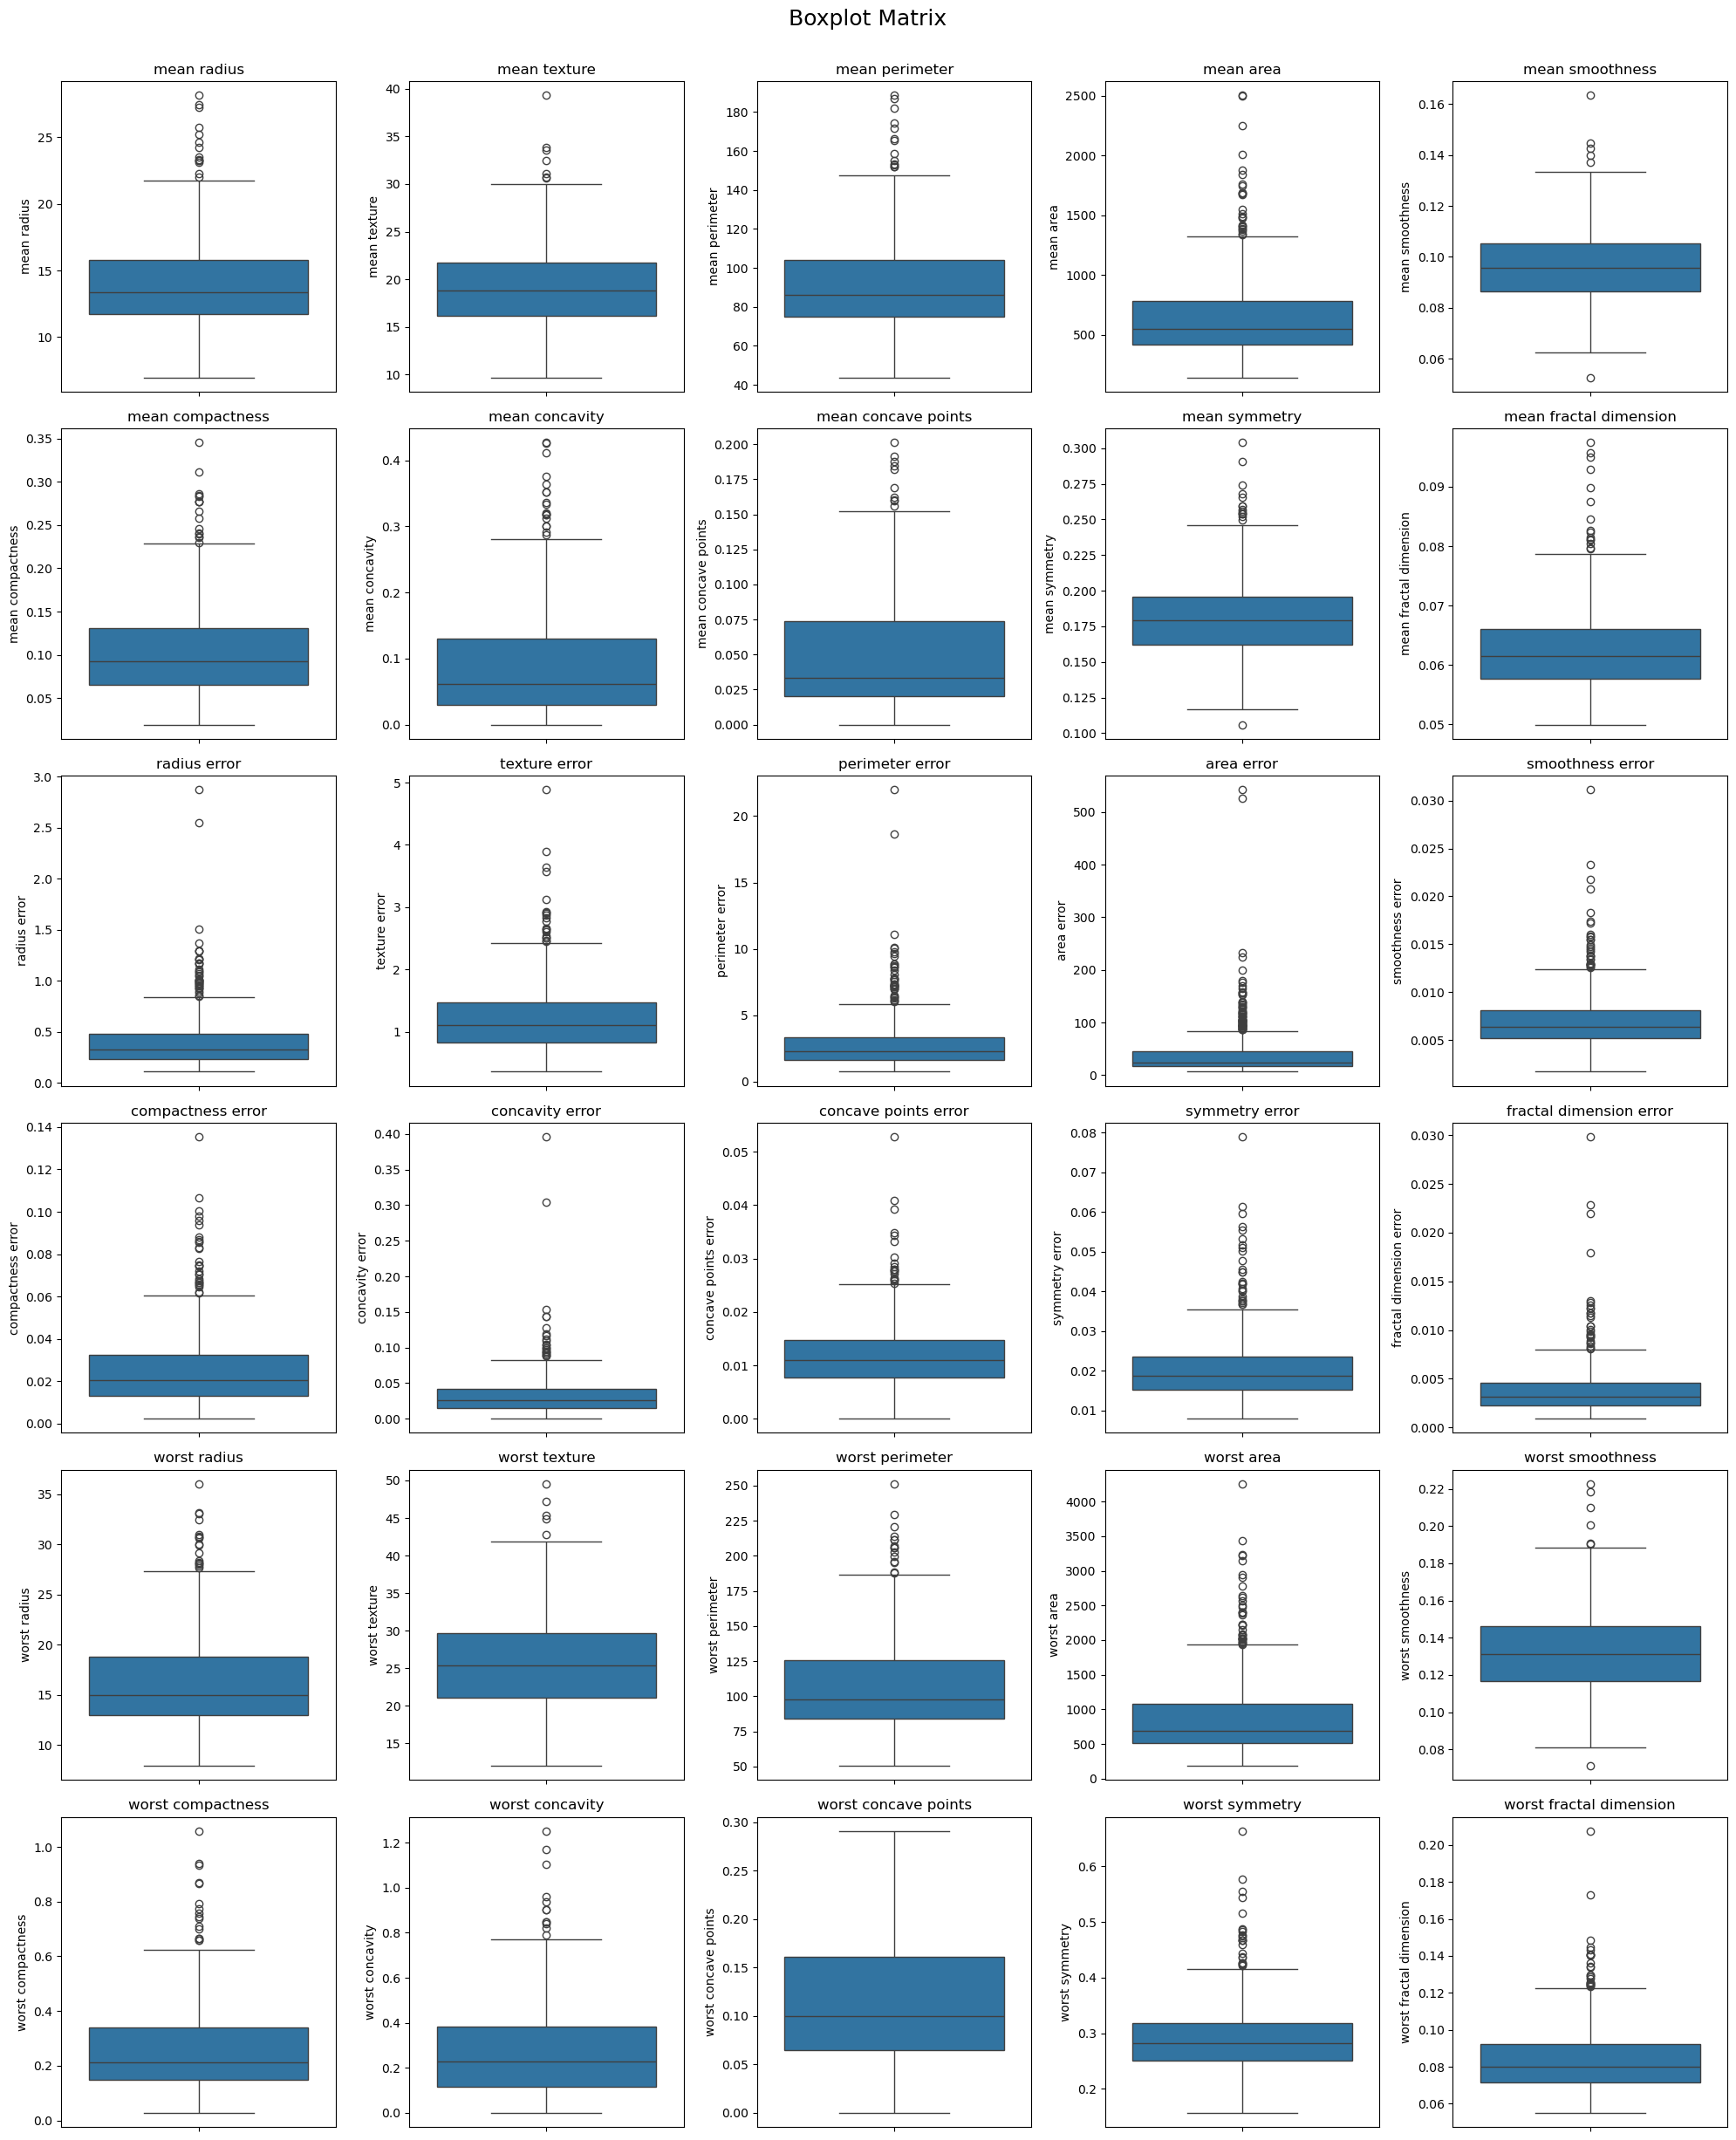

In [6]:
# Plot boxplot matrix
features = df.columns[:-1]  # exclude 'target'
n_cols = 5
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Matrix", fontsize=18, y=1.02)
plt.show()

Although some outliers are present in the dataset, I have chosen to retain them in the analysis. In medical datasets like this one, outliers may represent rare but critical cases, which could be important for the model to learn. Removing them might risk discarding valuable information that helps the model generalize, especially in identifying less common but serious conditions like malignancies.

# Exploratory Data Analysis
## Distribution of Features

Below, are visualizations of the distribution of selected features across the two classes, using histograms, boxplots, and other graphical cuts to better understand their separation and potential predictive power, also to get some intuition behind the data.

In [ ]:
sns.pairplot(df)
plt.show()

## Distribution of Features by Target

To enhance readability and interpretability, the pairplot has been split into separate views. This allows the viewer to focus more clearly on the scatter plots and histograms, making it easier to explore the relationships between features and how they differ across the target classes.

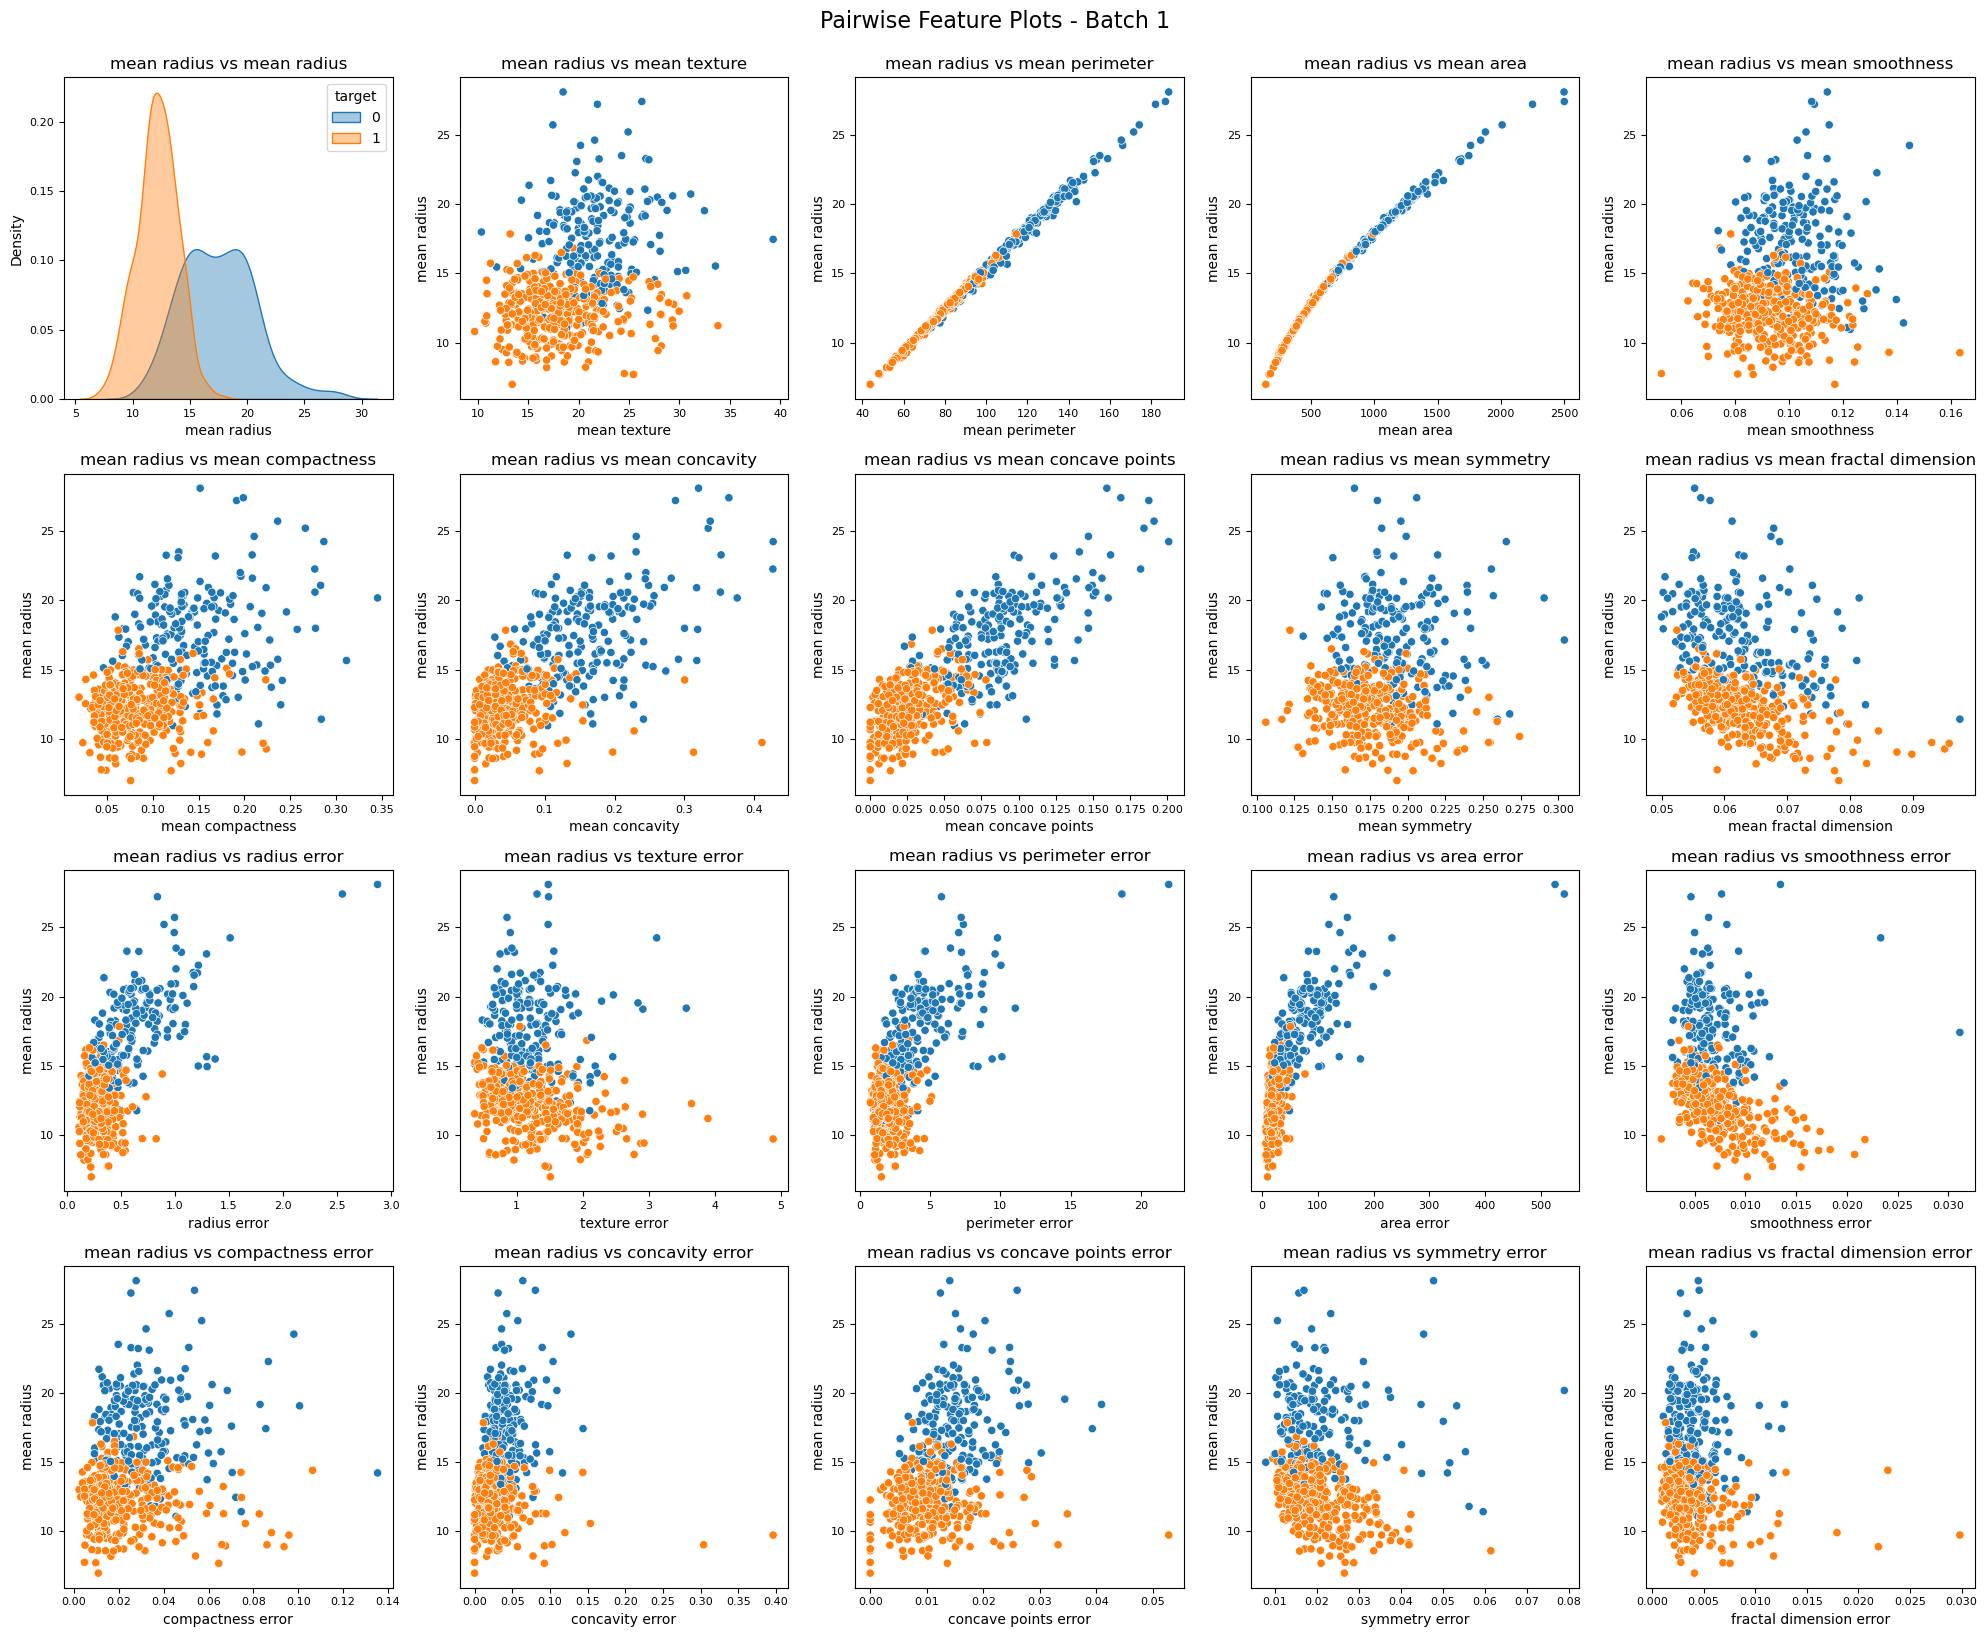

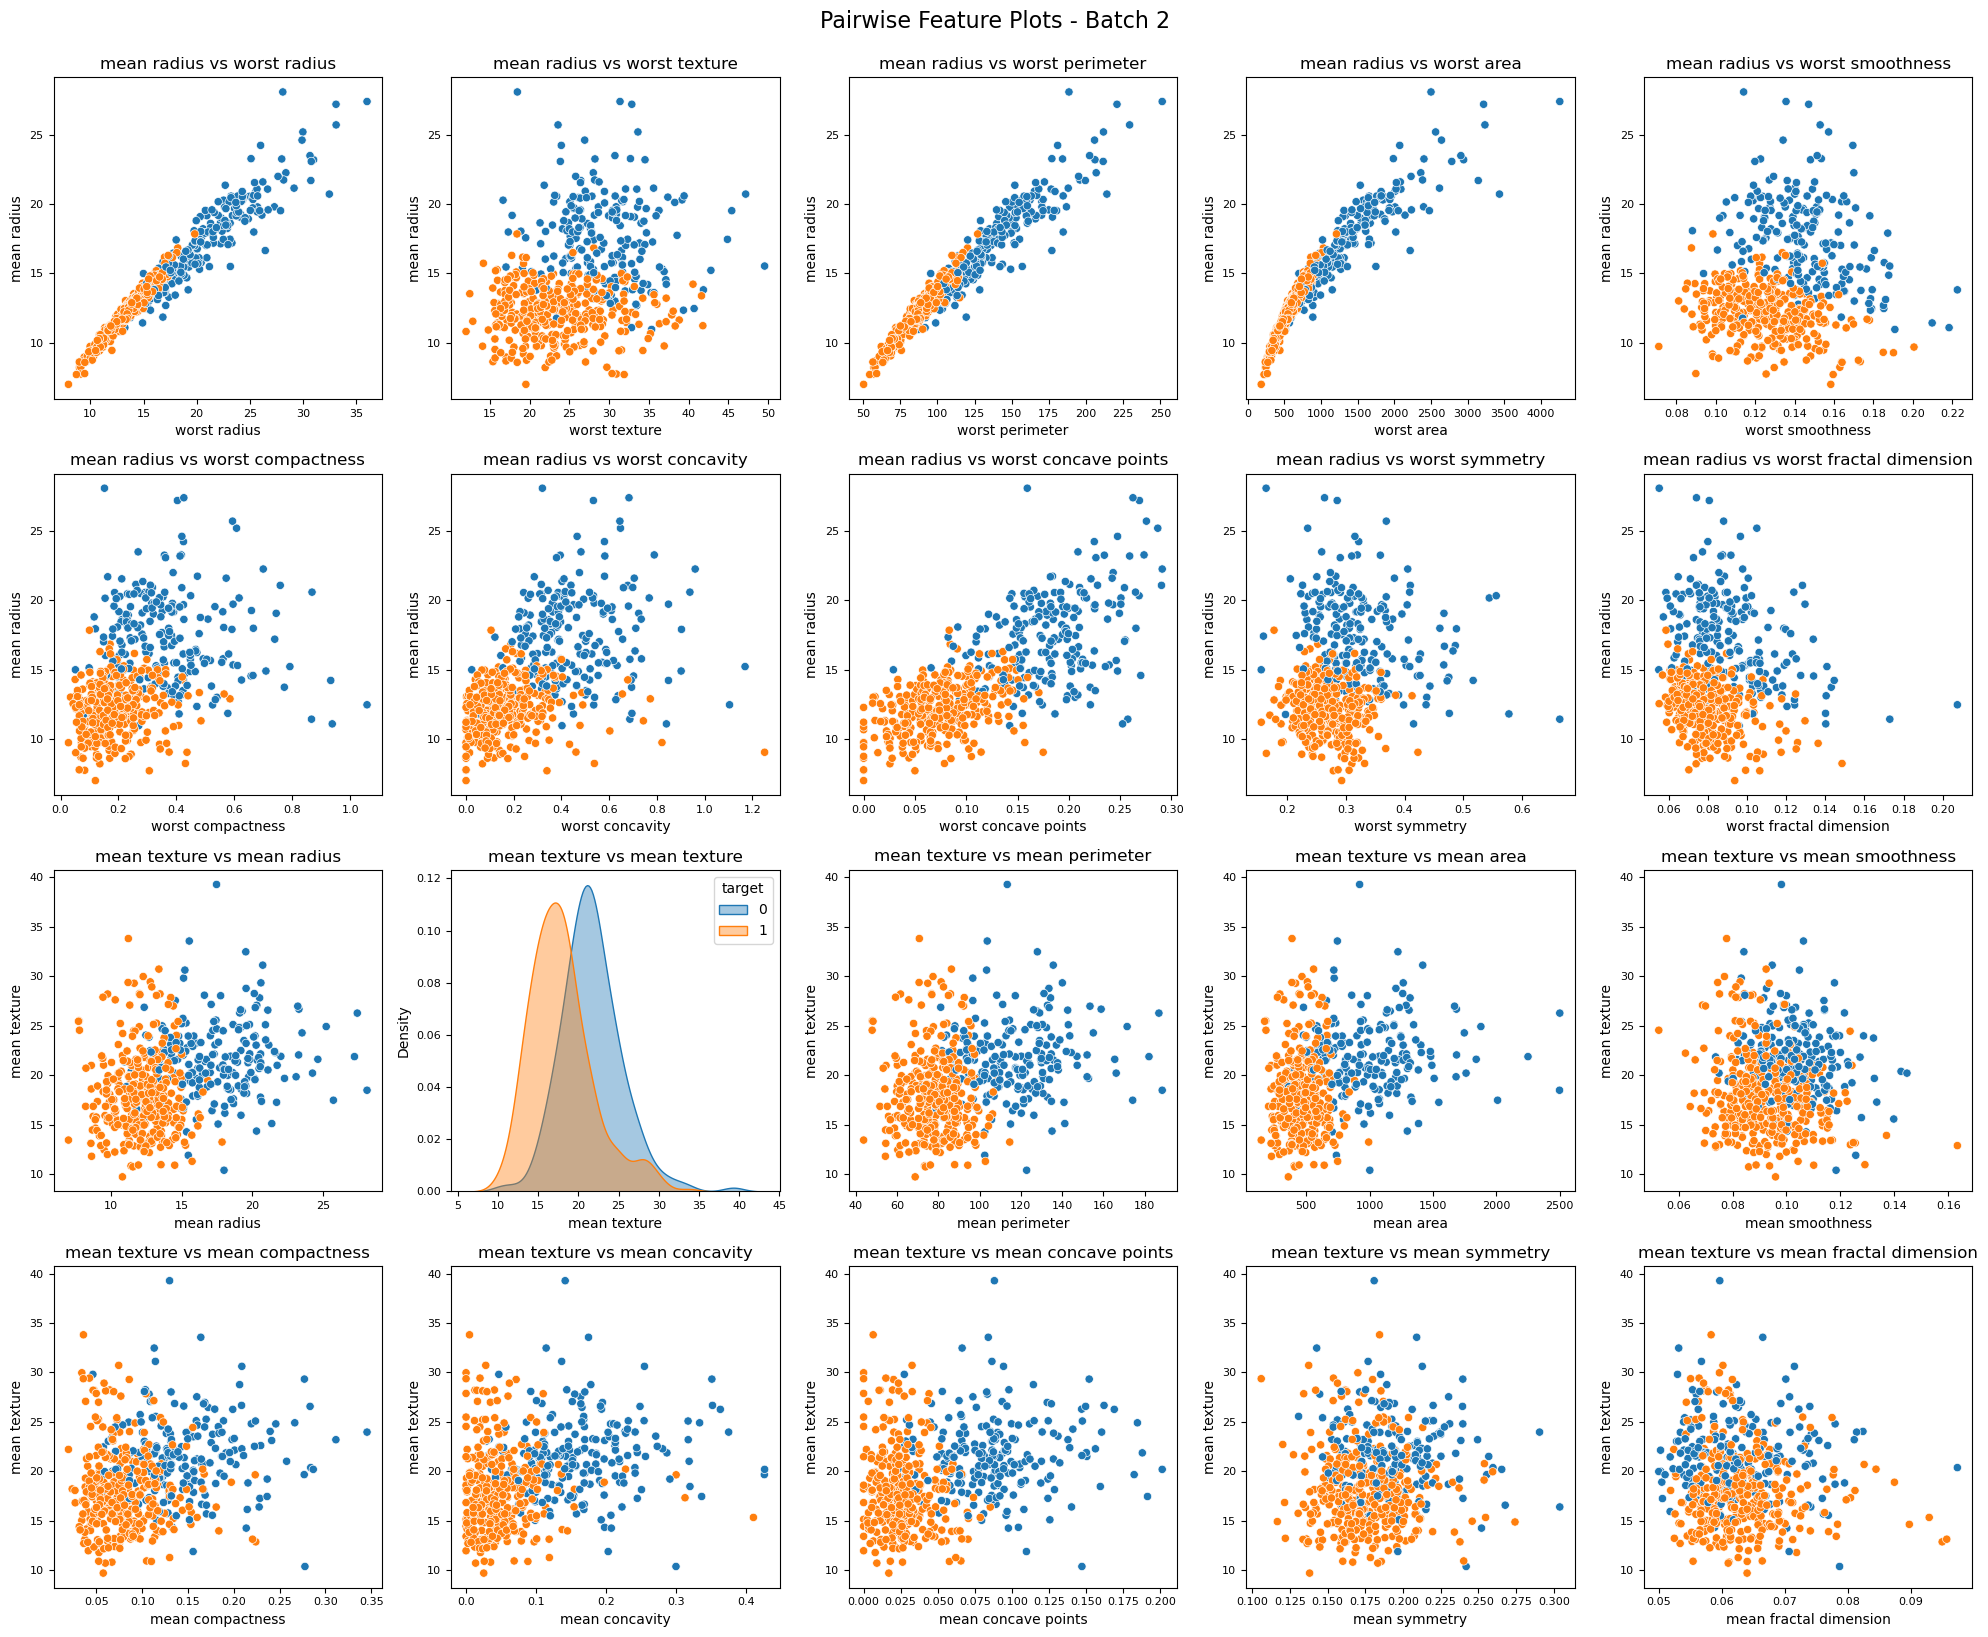

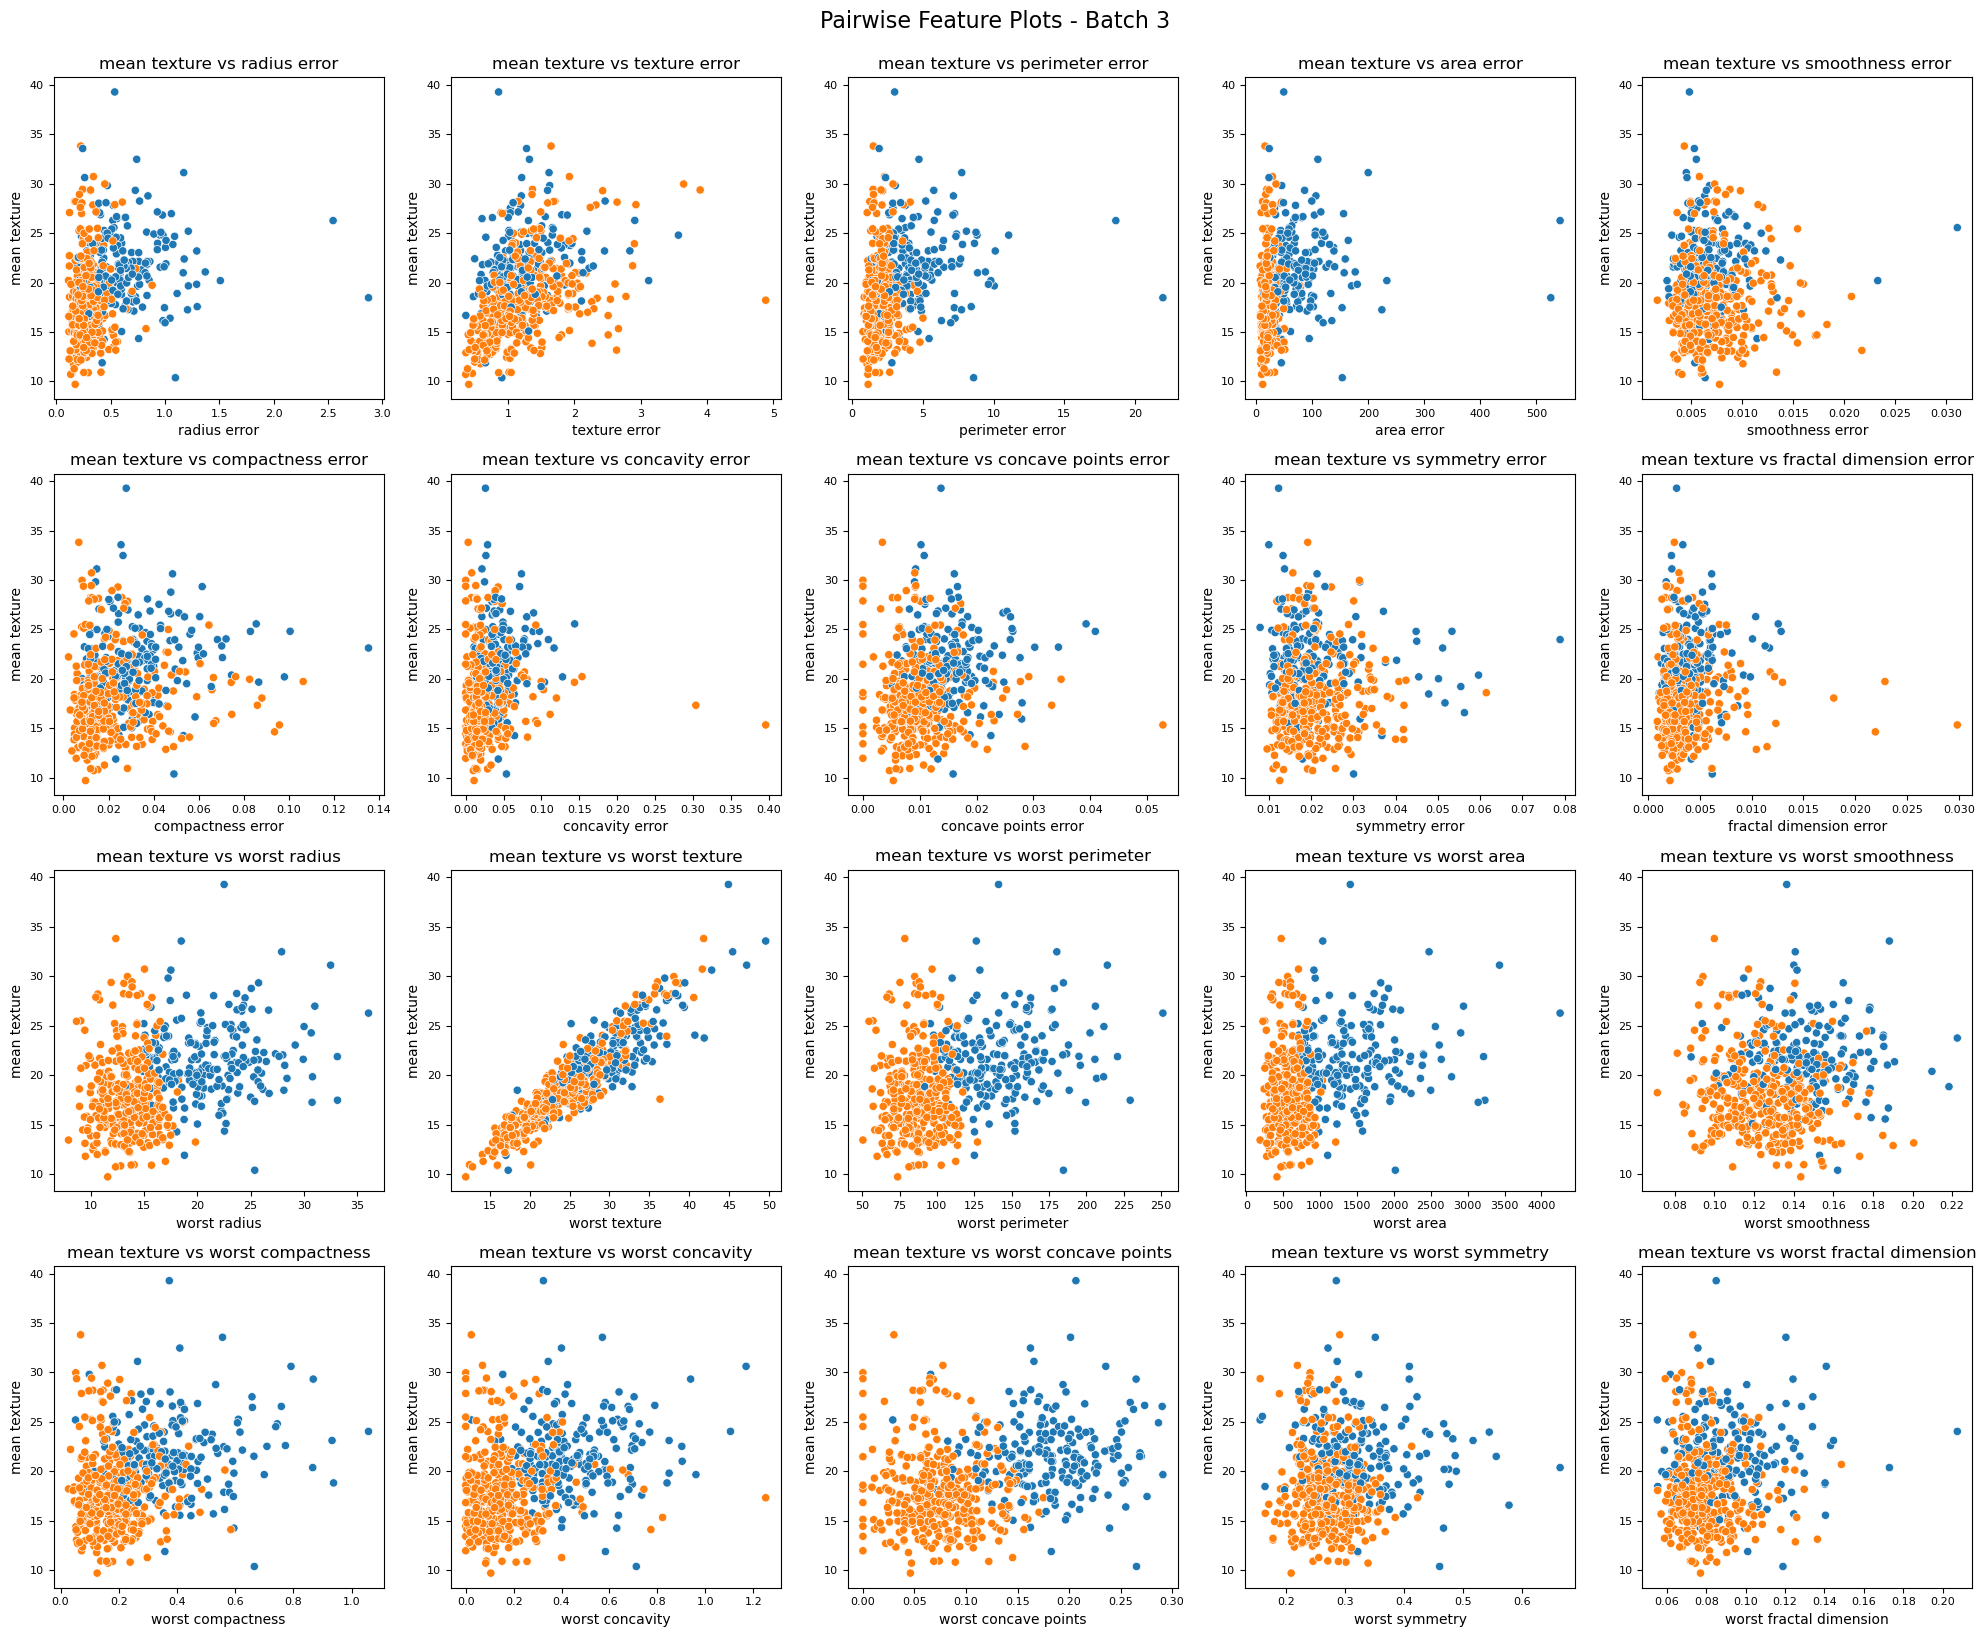

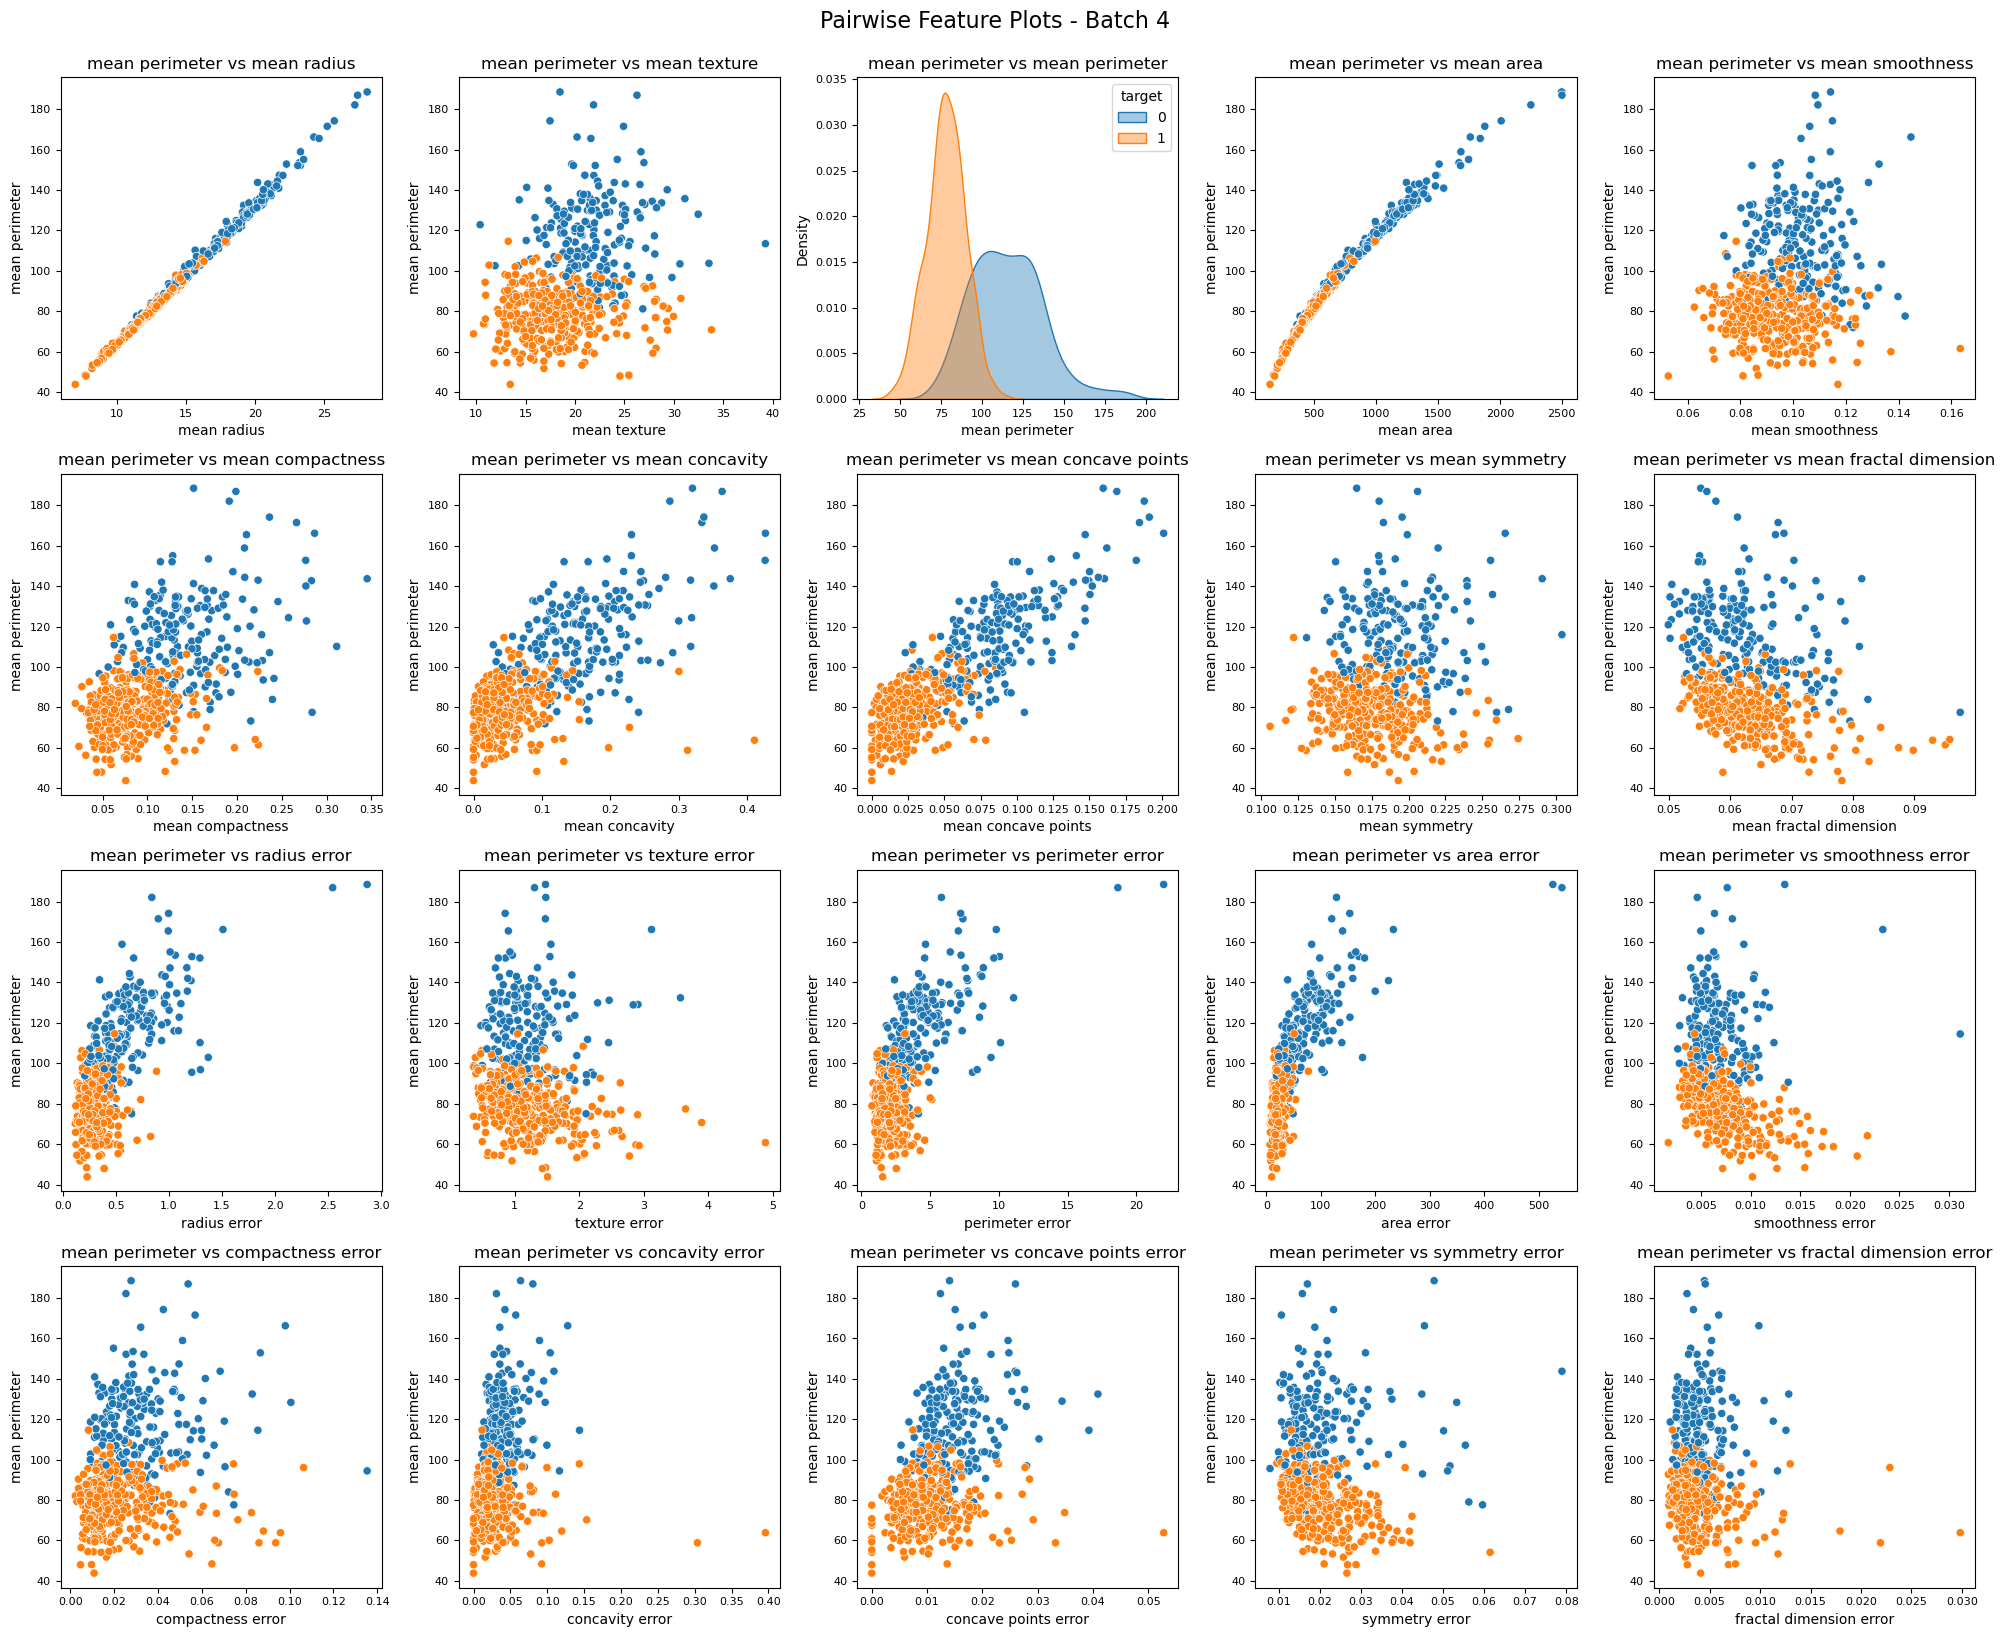

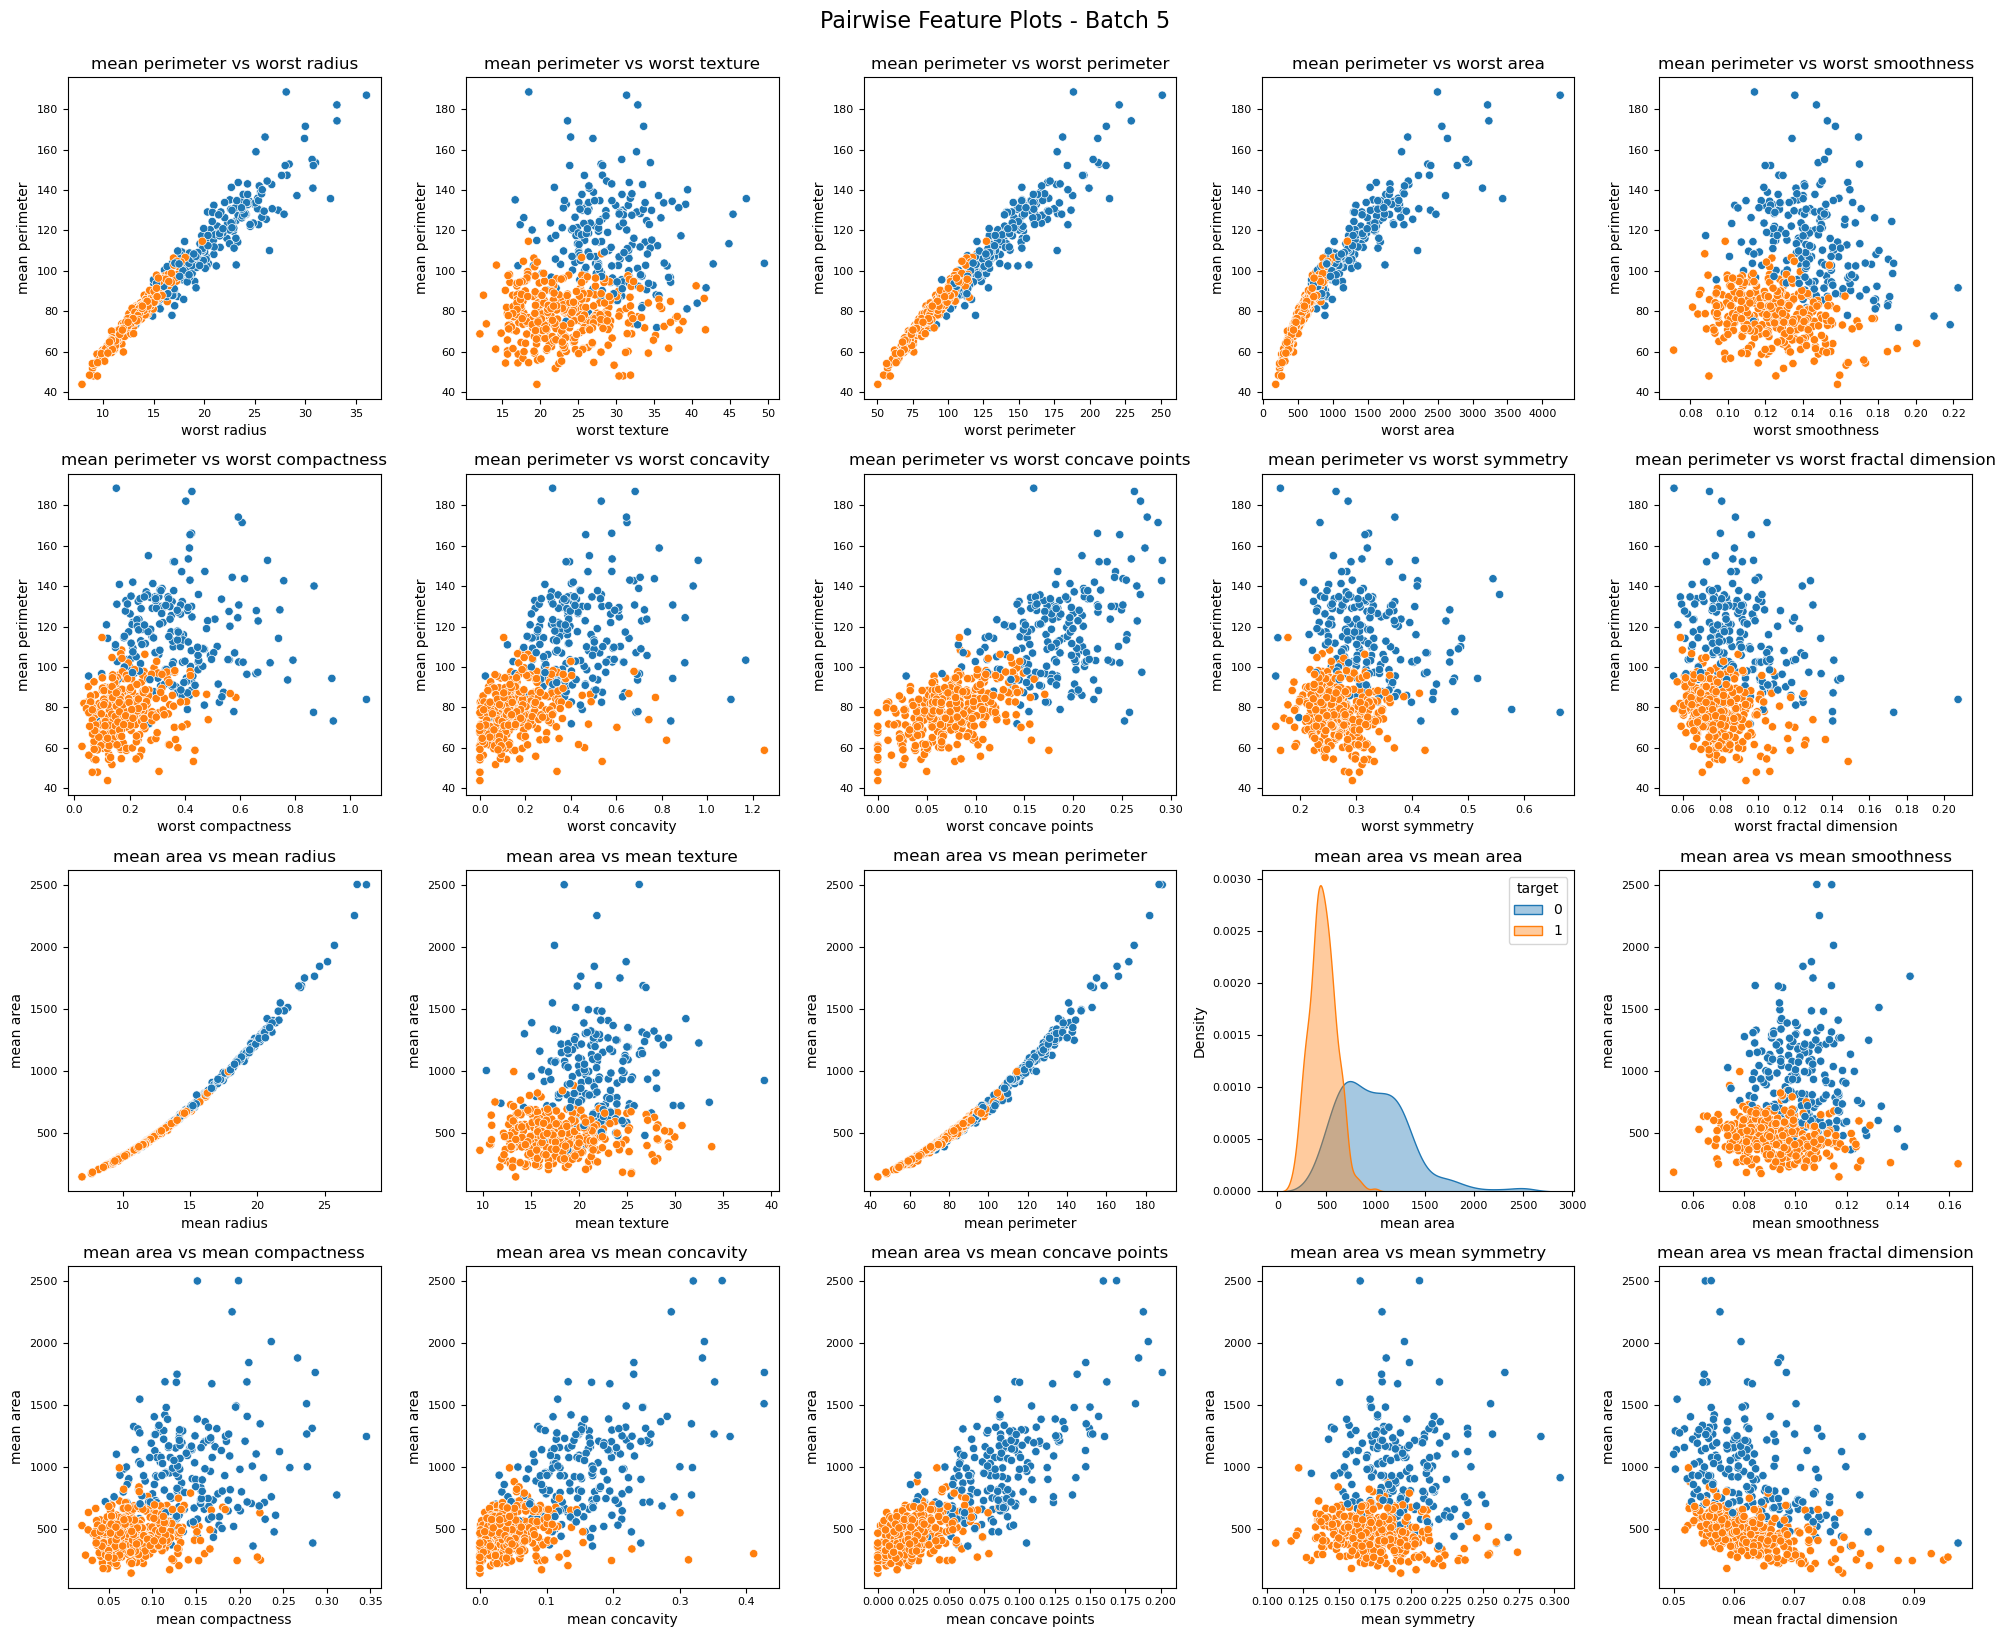

In [ ]:
plot_pairwise_in_chunks(df, hue="target", max_plots_per_fig=20)

The boxplots below help identify features where the distributions for different classes do not overlap significantly. Such features may be more informative or discriminative, indicating their potential importance in distinguishing between malignant and benign cases.

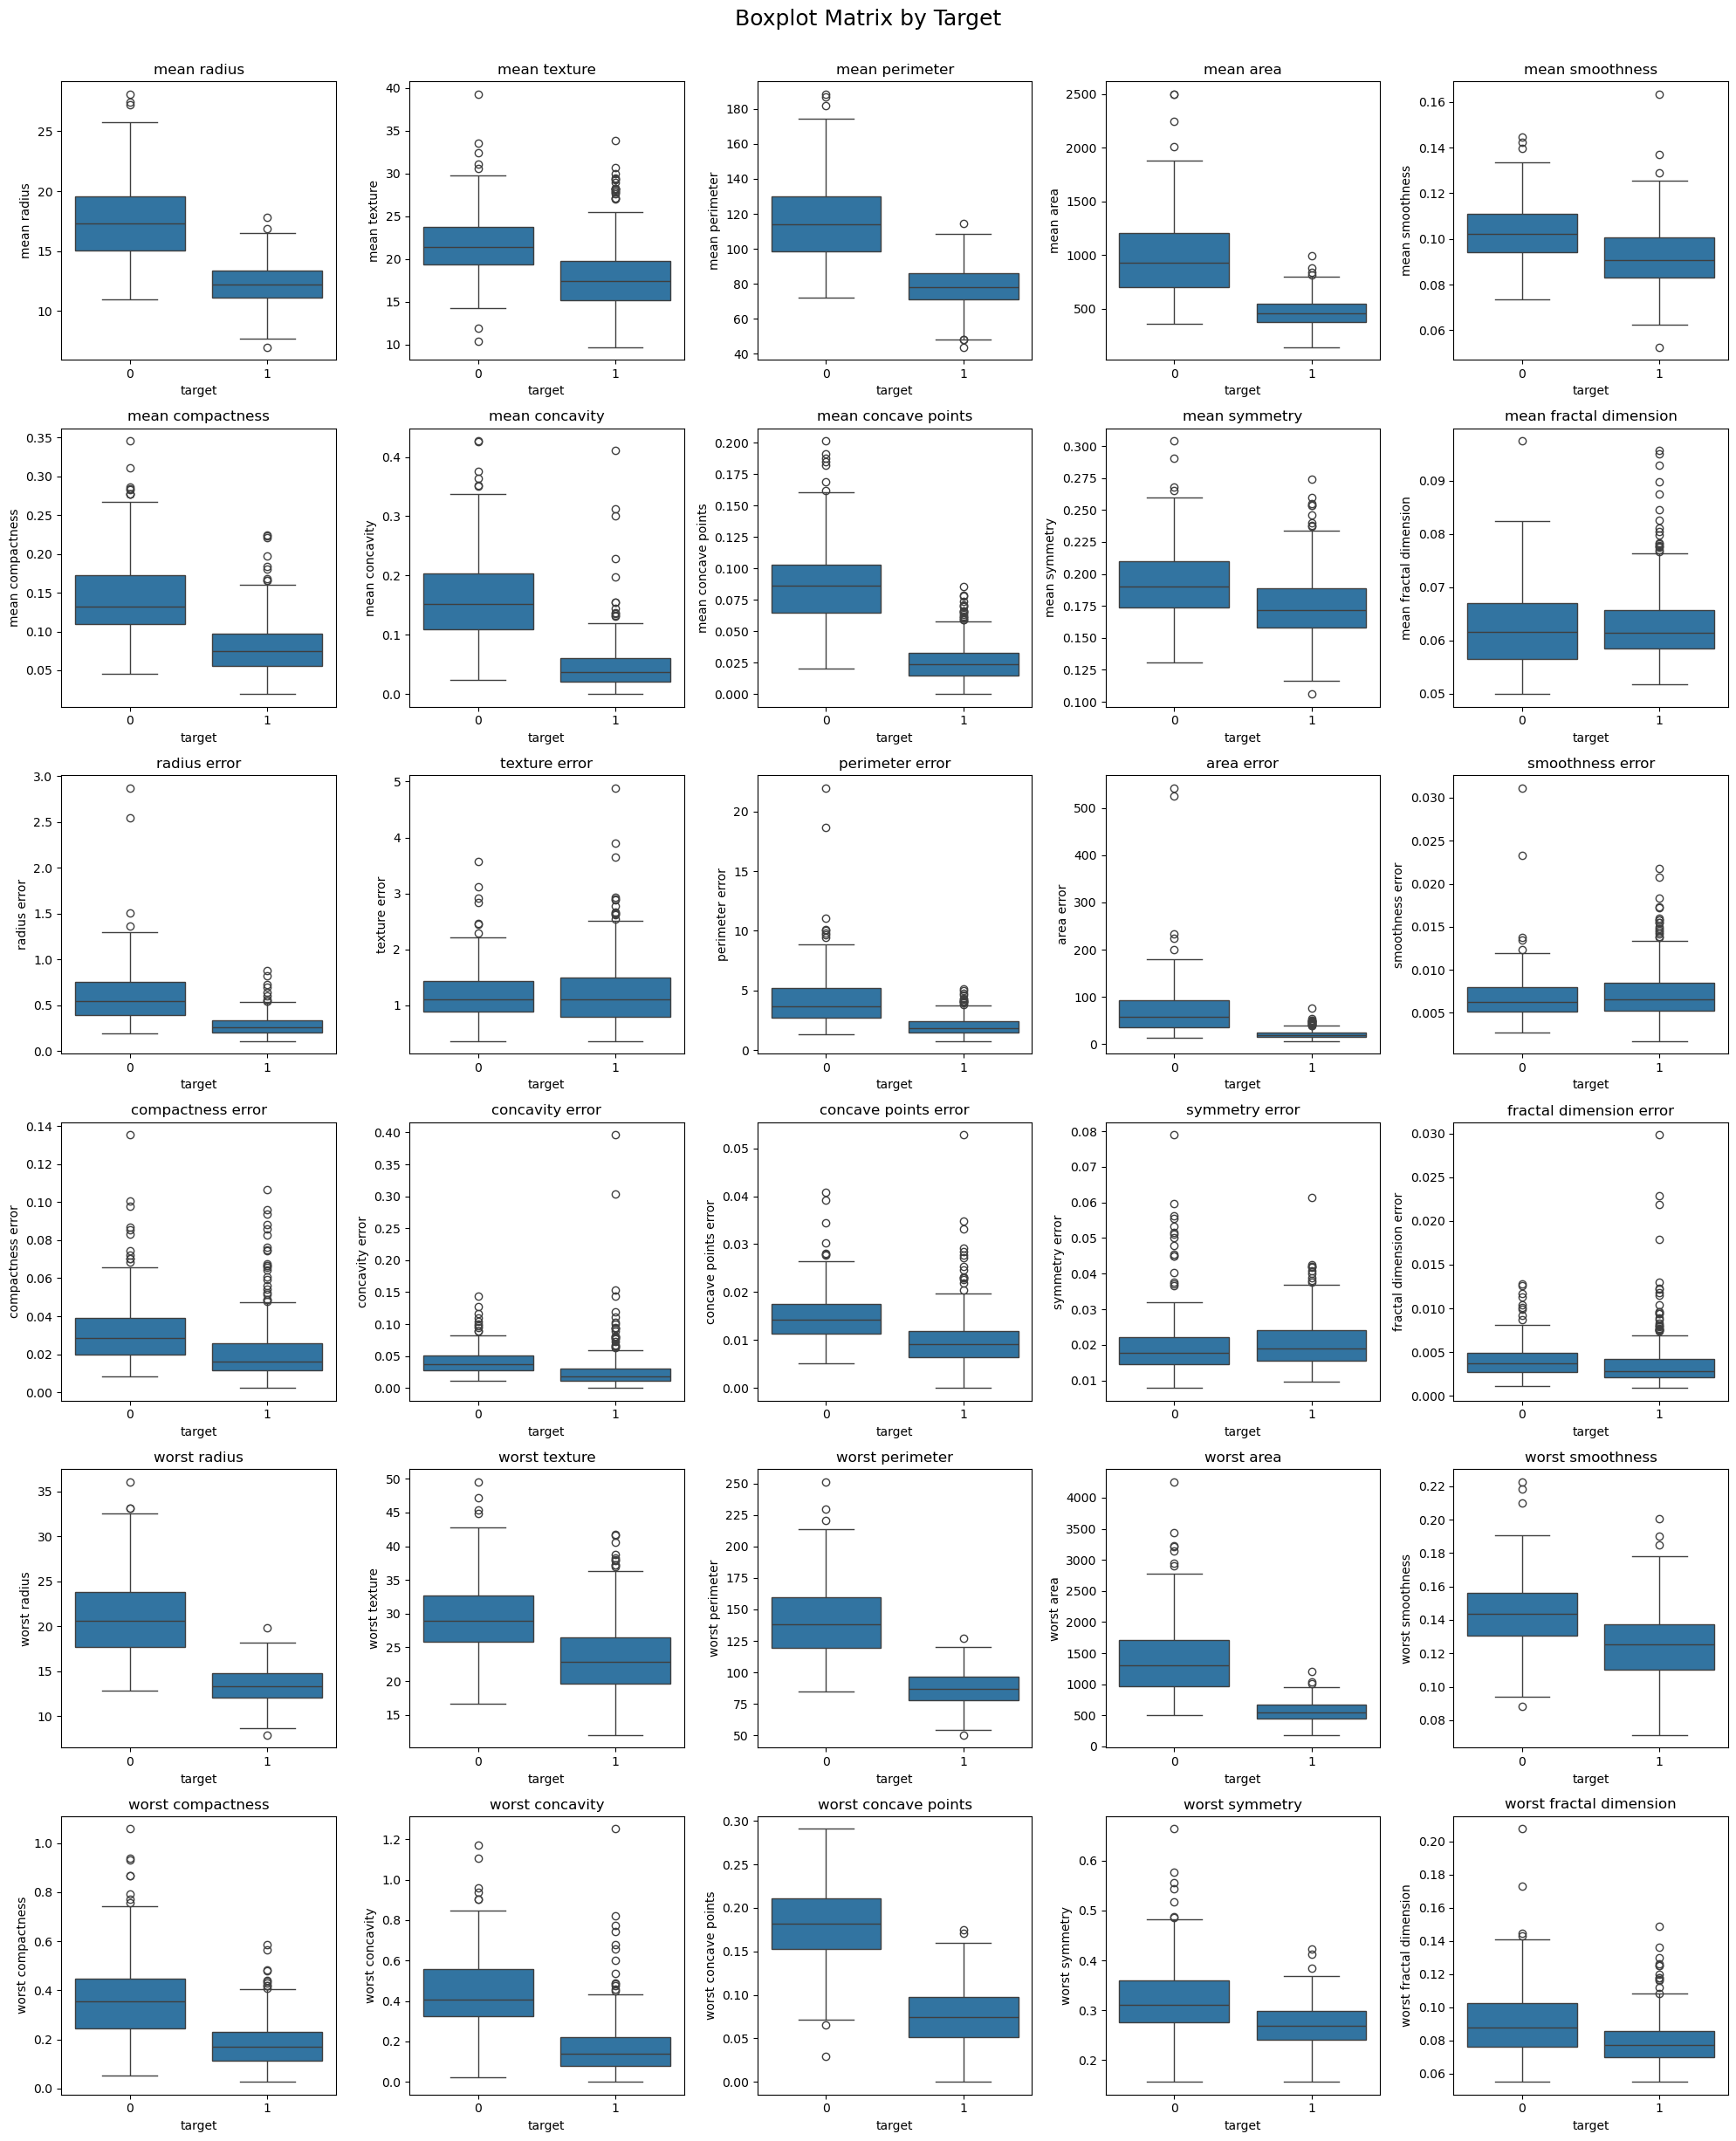

In [7]:
plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x="target", y=col)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Matrix by Target", fontsize=18, y=1.02)
plt.show()

# Correlation Analysis

Before fitting a logistic regression model, it's important to examine the correlations between features. Highly correlated (multicollinear) predictors can lead to unstable coefficient estimates, inflate standard errors, and make it harder to interpret the individual impact of each feature on the target variable.

By analyzing the correlation matrix, we can identify pairs of features with strong linear relationships. This insight helps in feature selection or dimensionality reduction, which can improve model performance and interpretability.

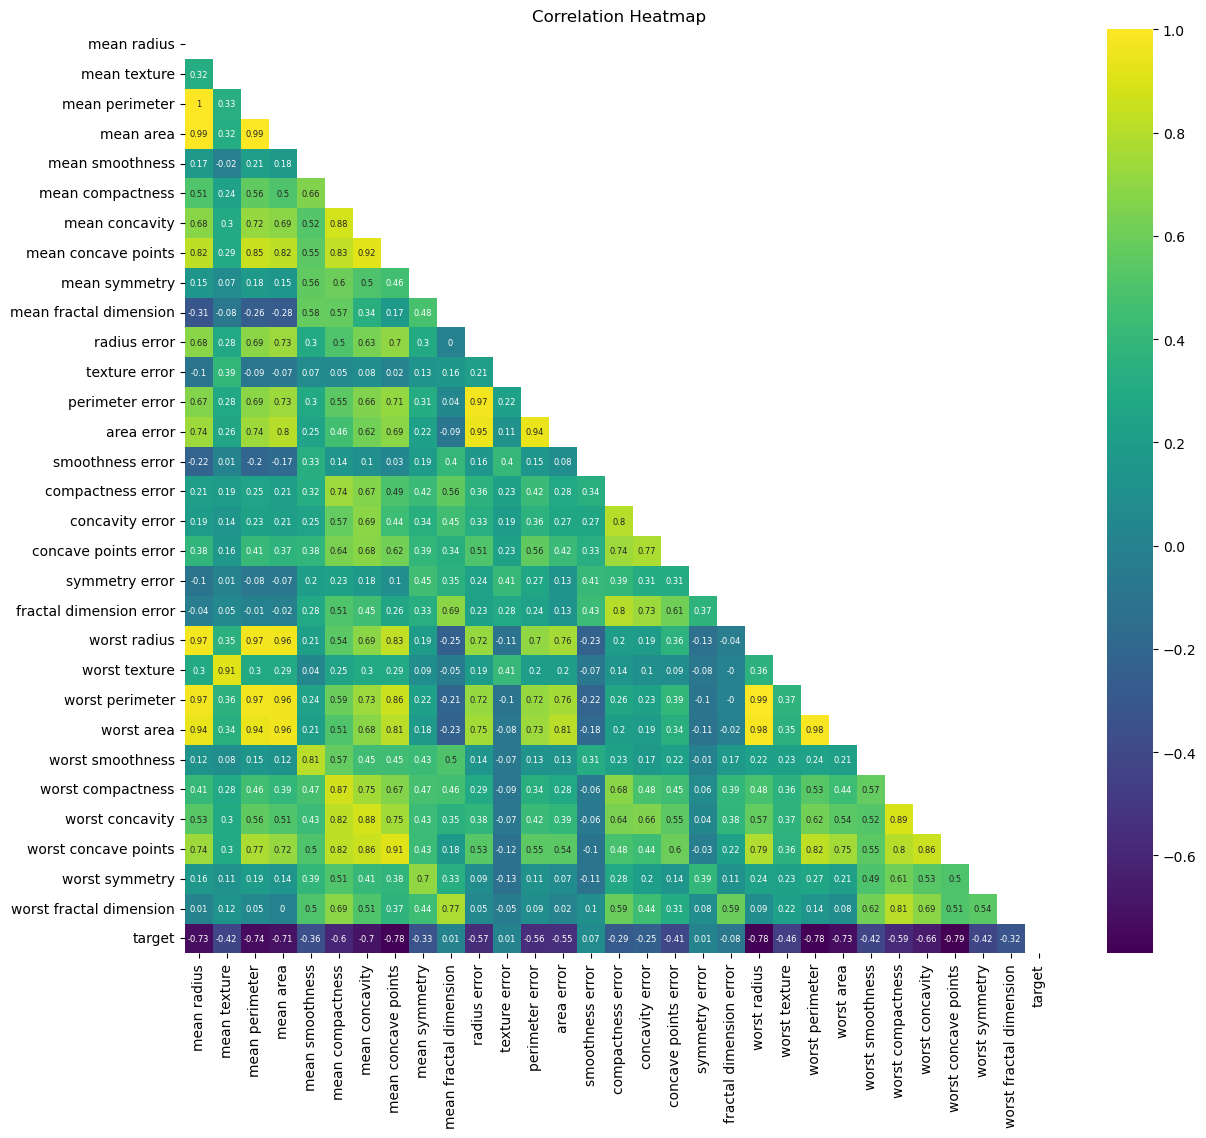

In [8]:
corr_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="viridis", mask=mask, annot=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

# Logistic Regression

To model the probability of a tumor being benign or malignant, I used logistic regression, a widely used and interpretable classification algorithm. The dataset was split into training (80%) and testing (20%) subsets to ensure that model evaluation is performed on unseen data.

Since logistic regression is sensitive to feature scales, the input features were standardized to have zero mean and unit variance using StandardScaler.

The model's performance was evaluated using multiple metrics:

    Accuracy: measures the overall correctness of predictions.

    Confusion Matrix: shows true/false positives and negatives.

    Classification Report: includes precision, recall, and F1-score for each class.

    ROC AUC Score: evaluates the model's ability to distinguish between classes, regardless of threshold.

These metrics provide a comprehensive understanding of how well the model performs in predicting breast cancer diagnoses.

In [9]:
# Splitting and scaleing data
X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Fitting the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [11]:
# Evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

Accuracy: 0.974
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.997


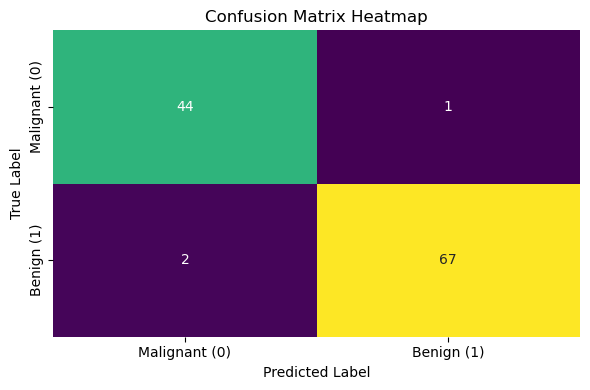

In [12]:
# Plotting confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar=False,
    xticklabels=["Malignant (0)", "Benign (1)"],
    yticklabels=["Malignant (0)", "Benign (1)"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

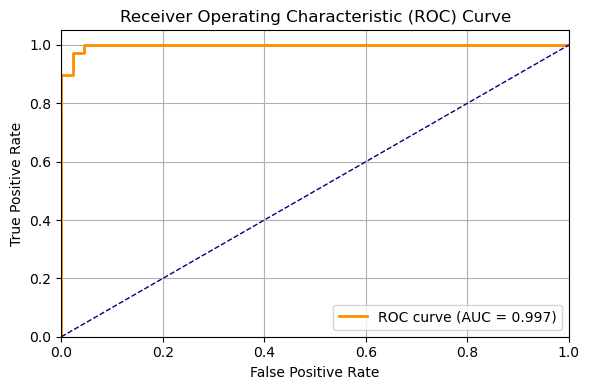

In [13]:
# Ploting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary

The logistic regression model performed exceptionally well on the test set:

    Accuracy: 0.974 — indicating that nearly 97% of predictions were correct.

    Confusion Matrix: Only 3 misclassifications out of 114 samples (1 false positive, 2 false negatives).

    Precision & Recall: Both classes achieved high scores, with precision and recall ranging from 0.96 to 0.99, reflecting strong performance in detecting both malignant and benign cases.

    F1-Score: Balanced around 0.97–0.98, showing that the model maintains both high precision and recall.

    ROC AUC Score: 0.997 — suggesting excellent discriminatory ability, very close to perfect classification.

Overall, the model shows high accuracy, robustness, and reliability, making it well-suited for medical diagnostic support in this context.